In [1]:
import numpy as np
import pandas as pd
import random as rd
from sklearn.decomposition import PCA
from sklearn import preprocessing
import matplotlib.pyplot as plt

In [2]:
genes = ['gene' + str(i) for i in range(1,101)]
genes[0:5]

['gene1', 'gene2', 'gene3', 'gene4', 'gene5']

In [3]:
wt = ['wt' + str(i) for i in range(1,6)]
ko = ['ko' + str(i) for i in range(1,6)]
wt, ko

(['wt1', 'wt2', 'wt3', 'wt4', 'wt5'], ['ko1', 'ko2', 'ko3', 'ko4', 'ko5'])

In [4]:
# the "stars" unpack the "wt" and "ko" arrays so that 
# the columns names are a single array that looks like this:
# [wt1, ..., wtn, ko1, ..., kon]

data = pd.DataFrame(columns=[*wt, *ko], index=genes)
data

# without the "starts", it would be the an array of two arrays
# and that wouldn't create 12 columns like we want

,wt1,wt2,wt3,wt4,wt5,ko1,ko2,ko3,ko4,ko5
gene1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
gene2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
gene3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
gene4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
gene5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
gene96,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
gene97,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
gene98,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
gene99,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
for gene in   data.index:
    data.loc[gene, 'wt1':'wt5'] = np.random.poisson(lam=rd.randrange(10,1000), size=5)
    data.loc[gene, 'ko1':'ko5'] = np.random.poisson(lam=rd.randrange(10,1000), size=5)

In [6]:
# genomic data is often stored like follow way: 
# samples are vertically and columns are horizontally
# so genes are features and wt and ko are samples
data

,wt1,wt2,wt3,wt4,wt5,ko1,ko2,ko3,ko4,ko5
gene1,790,863,843,806,799,645,609,602,594,647
gene2,865,872,879,887,898,586,539,599,557,524
gene3,195,190,179,194,237,297,277,324,307,319
gene4,101,101,107,105,140,17,11,20,16,18
gene5,864,899,952,885,870,748,742,799,804,768
...,...,...,...,...,...,...,...,...,...,...
gene96,528,503,544,542,490,90,97,109,115,106
gene97,230,241,212,221,217,800,856,799,902,868
gene98,357,363,376,357,317,329,367,345,325,329
gene99,701,648,731,693,666,615,604,580,571,559


In [7]:
scaled_data = preprocessing.scale(data.T)
#scaled_data

In [8]:
scaled_data_ = preprocessing.StandardScaler().fit_transform(data.T)
#scaled_data_

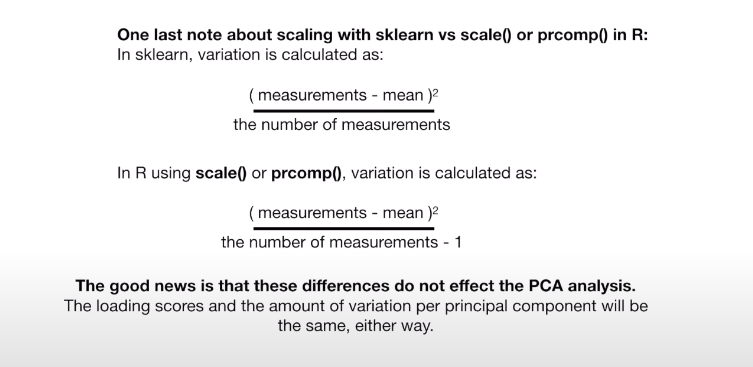

In [9]:
pca = PCA()
pca.fit(scaled_data)
pca_data = pca.transform(scaled_data)
#pca_data

In [10]:
# a scree plot to see how many principal components should go
# into the final plot
pca.explained_variance_ratio_

array([8.45947272e-01, 3.85769556e-02, 3.12783178e-02, 2.05374371e-02,
       1.84522348e-02, 1.55827740e-02, 1.25857283e-02, 1.15951131e-02,
       5.44416737e-03, 5.42518074e-33])

In [11]:
# the first thing we do is calculate the percentage of variation
# that each principal component accounts for
per_var = np.round(pca.explained_variance_ratio_ * 100, decimals=1)
per_var

array([84.6,  3.9,  3.1,  2.1,  1.8,  1.6,  1.3,  1.2,  0.5,  0. ])

In [12]:
# now we create labels for the scree plot
labels = ['PC' + str(x) for x in range(1, len(per_var)+1)]

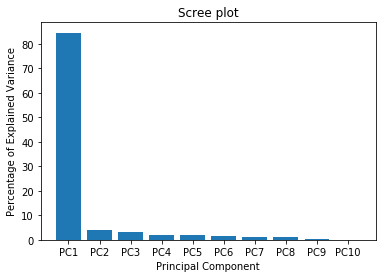

In [13]:
plt.bar(x=range(1, len(per_var)+1), height=per_var, tick_label=labels)
plt.ylabel('Percentage of Explained Variance')
plt.xlabel('Principal Component')
plt.title('Scree plot')
plt.show()

In [14]:
pca_df = pd.DataFrame(pca_data, index=[*wt, *ko], columns=labels)
pca_df

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10
wt1,9.317770,-1.715094,-1.476857,0.608915,1.191538,1.102418,1.771316,1.605800,0.191208,3.747003e-15
wt2,9.222061,-0.402398,-1.481986,-0.838386,-2.194507,-1.345270,-1.143605,1.145987,-0.724901,3.871903e-15
wt3,9.633582,1.982188,0.366197,2.289501,-0.080311,1.044737,-1.640653,-0.266415,0.868457,7.910339e-15
wt4,9.128269,-2.691727,3.040696,-0.695481,0.382812,0.710111,-0.192181,-1.275406,-0.777399,-1.776357e-15
wt5,8.669891,2.862782,-0.405390,-1.508532,0.694683,-1.569769,1.270948,-1.236904,0.455198,3.996803e-15
ko1,-9.035870,-1.548363,-1.828380,0.267522,2.611688,-1.213365,-1.391845,-0.329230,-0.139449,-1.415534e-15
ko2,-9.057602,-0.793890,-1.158630,2.281724,-1.790320,-0.251360,1.266676,-1.377760,-0.340615,-2.137179e-15
ko3,-9.425617,-1.794869,2.011907,-0.857073,-0.967304,-0.739377,0.052034,0.714909,1.505290,-3.330669e-15
ko4,-9.278027,1.201089,-1.557237,-2.232131,-0.475360,2.519757,-0.351248,-0.338653,-0.085023,-4.440892e-15
ko5,-9.174457,2.900283,2.489679,0.683942,0.627082,-0.257883,0.358558,1.357671,-0.952766,-5.245804e-15


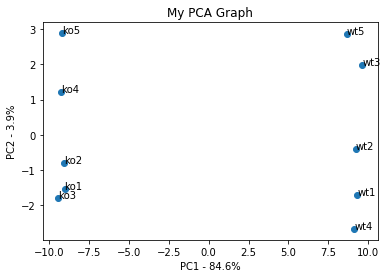

In [15]:
plt.scatter(pca_df.PC1, pca_df.PC2)
plt.title('My PCA Graph')
plt.xlabel('PC1 - {0}%'.format(per_var[0]))
plt.ylabel('PC2 - {0}%'.format(per_var[1]))

for sample in pca_df.index:
    plt.annotate(sample, (pca_df.PC1.loc[sample], pca_df.PC2.loc[sample]))
    
plt.show()

In [16]:
loading_scores = pd.Series(pca.components_[0], index=genes)
sorted_loading_scores = loading_scores.abs().sort_values(ascending=False)

In [17]:
top_10_genes = sorted_loading_scores[0:10].index.values

In [18]:
print(loading_scores[top_10_genes])

gene27   -0.108706
gene10   -0.108642
gene57    0.108636
gene52   -0.108630
gene18   -0.108623
gene25    0.108593
gene73   -0.108589
gene30    0.108588
gene95    0.108586
gene59    0.108585
dtype: float64


In [19]:
loading_scores

gene1      0.105728
gene2      0.107567
gene3     -0.103485
gene4      0.105537
gene5      0.098686
             ...   
gene96     0.108466
gene97    -0.108205
gene98     0.044121
gene99     0.098371
gene100    0.107872
Length: 100, dtype: float64

In [20]:
pca.components_[0].shape

(100,)